## Pràctica 5
### Una teulada per un canaló

[<center><img src=https://raw.githubusercontent.com/gjover/modelitzacio/main/notebooks/static/FiberGutter1.jpg width=50%></center>](#img_Gutter)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Una teulada per un canaló
- Un fabricant de canalons ha de preparar una fitxa tècnica del seu producte.
- Vol saber amb quin rang d'inclinació de la teula, intensitat de pluja i duració són compatibles els seus canalons.
- Necessita saber aquests valors per què l'aigua no vessi amb un CL del 99%.
- Els canalons són de mitja canya amb un diàmetre de $15.00 \pm 0.01 \,cm$.

### Dades $ $
- Per validar el model hem contractat un laboratori d'assaigs que ha fet les següents mesures:
    - Canaló de $12.00 \pm 0.01 \,m $
    - Canonada baixant de $63.0 \pm 0.1 \,mm$
    - Teulada amb superfície efectiva de $(12.00 \pm 0.01 \times 10.00 \pm 0.01) \,m^2$
    - Intensitats de pluja creixents 1 minut a $30.00 \pm 0.01 \,l/h$, 2 minuts a $60.00 \pm 0.01 \,l/h$ i 4 minuts a $90.00 \pm 0.01 \,l/h$
    - Es mesura el cabal d'aigua sobre la teula, el cabal d'aigua a la sortida de la canonada i el nivell d'aigua al canaló

Index(['t (s)', 'Flow in (ml/s)', 'Flow out (ml/s)', 'Level (mm)'], dtype='object')


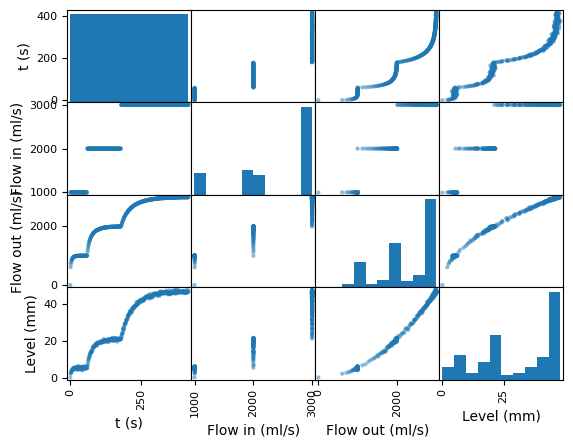

In [2]:
# Dades
data = pd.read_csv("https://raw.githubusercontent.com/gjover/modelitzacio/main/data/gutter.csv")
print(data.columns)
l = pd.plotting.scatter_matrix(data[data.columns])

### Coneixements previs
- El cabal d'aigua a una canonada en funció de la columna d'aigua a l'entrada és:

$$Q = A \sqrt{2gh}$$

    - Q és el cabal d'aigua
    - A és l'àrea de la secció de la canonada
    - g és l'acceleració de la gravetat ($9.80665 \,m/s^2$)
    - h és l'alçada de la columna d'aigua
- L'àrea del segment circular és:

$$
\begin{align}
A & = \frac{R^2}{2}\left(\theta - \sin \theta \right) \\
\cos \theta/2 & = \frac{R - h}{R} \\
\sin \theta/2 & = \frac{\sqrt{2Rh - h^2}}{R} \\
\sin \theta &= 2 \sin \theta/2 \cos \theta/2 \\
\end{align}
$$

[<center><img src=https://raw.githubusercontent.com/gjover/modelitzacio/main/notebooks/static/Circularsegment.png></center>](#img_Segment)

In [3]:
from sympy.abc import A, g, h, R, theta

# cabal d'aigua a una canonada
Q = A * sp.sqrt(2 * g * h)

# Àrea del segment circular
a = R * R / 2 * (theta - sp.sin(theta))

show(Q, qq, a)

<IPython.core.display.Math object>

## Apartats
- Descriu i analitza el sistema rellevant per a l'estudi (5 punts)
- Fes les assumpcions pertinents i argumenta-les adequadament (5 punts)
- Modelitza i resol el model (10 punts)
- Verifica i valida el model (10 punts)
- Fes una anàlisi crítica dels resultats (5 punts)

## Anàlisi del sistema

Descripció general, context i límits del model.

Paràmetres

### Context

Anem a estudiar un sol tipus de canaló  en diferents condicions de pluja, duració de la pluja i inclinació de la teulada. 

Considerem només un tipus de teulada.

  -Assumim que la resta de tipus de teulada tindran un comportament equivalent. 

No considerarem situacions amb altres esdeveniments climatològic com neu o pedregada.

Assumim que la pluja és constant.

Asssumim que el canaló i la canonada estan netes i en bones condicions de manteniment

Assumim que l'amplada de la teulada és igual a la llargària del canaló.

### Paràmetres

Intensitat de la pluja I= (10.00,20.00,30.00) +- 0.01 l/h

Radi del canaló R=7.5 cm 

Llargària del canaló L =12m

Diàmetre de la canonada d = 10cm

Amplada de la teulada a = L

Fondària de la teulada b = 6m

Inclinació de la teulada $\sigma$ = 30º

Alçada de l'aigua del canaló h

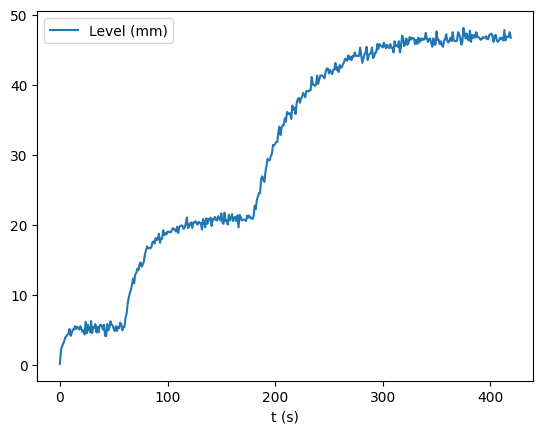

In [4]:
# Visualització de dades
l = data.plot(x="t (s)", y="Level (mm)")

## Assumpcions

Comportament dels paràmetres

Relacions entre els paràmetres

Assumim que el nivell d'aigua al canaló depèn del volum d'aigua al canalo.

El volum d'aigua al canaló depèn de l'aigua provinent de la teula i la que surt per la canonada.

- La variació de volum serà la diferència entre el cabal entrant i sortint 

$ V'(t) = Q_i - Q_o $

## Modelització

In [74]:
from sympy.abc import t,I,R,L,d,a,b,theta
h=sp.Function('h')(t)
valors = {R: 7.5, L:12*100 , d:10, b:6*100, 'theta': np.deg2rad(30), g:9.80665* 100  }

a=L

#Àrea efectiva de la teulada

Ao= a * b * sp.cos(theta)

#Àrea de la canonada

Ac = sp.pi * (d/2)**2

# Cabal d'aigua replegada 

Qi = I * Ao

#Cabal de l'aigua sortint 

Qo = Ac * sp.sqrt(2 * g *h)

show(Qi, qq, Qo)

<IPython.core.display.Math object>

In [75]:
# Volum d'aigua al canaló 

theta = 2 *sp.acos((R - h)/R)

A = (R* R/2 * (theta - sp.sin(theta))).simplify()
V = L * A
V

     ⎛      _________________                             ⎞
     ⎜     ╱ ⎛    h(t)⎞                                   ⎟
     ⎜    ╱  ⎜2 - ────⎟⋅h(t)                              ⎟
   2 ⎜   ╱   ⎝     R  ⎠       ⎛     h(t)⎞       ⎛R - h(t)⎞⎟
L⋅R ⋅⎜  ╱    ─────────────── ⋅⎜-1 + ────⎟ + acos⎜────────⎟⎟
     ⎝╲╱            R         ⎝      R  ⎠       ⎝   R    ⎠⎠

In [76]:
Vp = sp.diff(V, t).simplify()
Vp

           ___________________         
          ╱ (2⋅R - h(t))⋅h(t)  d       
2⋅L⋅R⋅   ╱  ───────────────── ⋅──(h(t))
        ╱            2         dt      
      ╲╱            R                  

In [77]:
eq = sp.Eq(Vp, Qi - Qo)
eq

           ___________________                                 2   ________
          ╱ (2⋅R - h(t))⋅h(t)  d                         √2⋅π⋅d ⋅╲╱ g⋅h(t) 
2⋅L⋅R⋅   ╱  ───────────────── ⋅──(h(t)) = I⋅L⋅b⋅cos(θ) - ──────────────────
        ╱            2         dt                                4         
      ╲╱            R                                                      

In [78]:
sp.classify_ode(eq)

('factorable',
 'separable',
 '1st_exact',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral')

In [79]:
ics = {h.subs(t,0):0}
# taylor

ht2 = sp.dsolve(eq, h,hint= '1st_power_series', n=2)
ht3 = sp.dsolve(eq, h,hint= '1st_power_series', n=3)
ht4 = sp.dsolve(eq, h, hint='1st_power_series', n=4)

In [100]:
v = {I:3000, 'C1': float(data['Level (mm)'][0]) / 100}

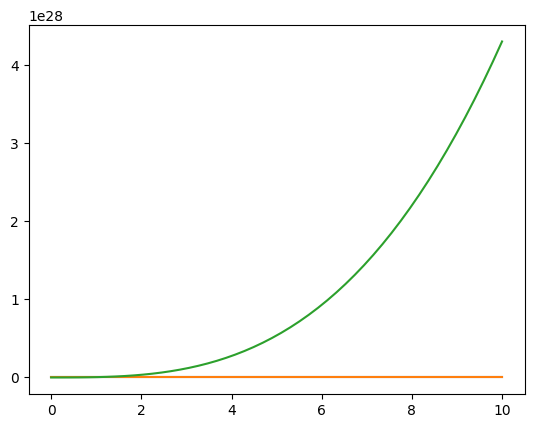

In [101]:
ht2t = sp.lambdify(t, ht2.rhs.removeO().subs(valors).subs(v))
ht3t = sp.lambdify(t, ht3.rhs.removeO().subs(valors).subs(v))
ht4t = sp.lambdify(t, ht4.rhs.removeO().subs(valors).subs(v))
temps = np.linspace(0,10,50)
plt.plot(temps,ht2t(temps))
plt.plot(temps,ht3t(temps))
plt.plot(temps,ht4t(temps))

In [102]:
(ht3.rhs.removeO().subs(valors).subs(v)-ht4.rhs.removeO().subs(valors).subs(v)).subs('C1',0.001).n()

                       3
-4.29581644995369e+25⋅t 

In [103]:
# punt estabilitat
hp = h.diff(t)
hp0 = sp.solve(eq,hp)[0]
hp0

       ___________________                                      
      ╱ (2⋅R - h(t))⋅h(t)  ⎛                       2   ________⎞
R⋅   ╱  ───────────────── ⋅⎝4⋅I⋅L⋅b⋅cos(θ) - √2⋅π⋅d ⋅╲╱ g⋅h(t) ⎠
    ╱            2                                              
  ╲╱            R                                               
────────────────────────────────────────────────────────────────
                     8⋅L⋅(2⋅R - h(t))⋅h(t)                      

In [104]:
hest = sp.solve(hp0,h)[0]

In [105]:
hmax = sp.Symbol('h_M')
A = sp.Symbol('A')
sim = {L*b:A,'theta':0}

Imax = sp.solve(sp.Eq(hest.subs(sim),hmax),I)[0]
Amax = sp.solve(sp.Eq(hest.subs(sim),hmax),A)[0]
show(Imax,qq,Amax)

<IPython.core.display.Math object>

In [106]:
# coeficients d sensabilitat

In [107]:
hsim = hest.subs('theta',0)
hsim

   2  2  2
8⋅I ⋅L ⋅b 
──────────
  2  4    
 π ⋅d ⋅g  

$ CI = 2 \hspace{1cm} CL = 2 \hspace{1cm} Cb = 2 \hspace{1cm} Cd = -4 \hspace{1cm} Cg = -1 $

In [108]:
# ultims 20s
hqD = np.array([np.mean(data.loc[40:60]['Level (mm)'] / 10),
                np.mean(data.loc[160:180]['Level (mm)'] / 10),
                np.mean(data.loc[400:420]['Level (mm)'] / 10)])
uhq = np.array([np.std(data.loc[40:60]['Level (mm)'] / 10),
                np.std(data.loc[160:180]['Level (mm)'] / 10),
                np.std(data.loc[400:420]['Level (mm)'] / 10)])
hqD,uhq

(array([0.52714286, 2.08904762, 4.6765    ]),
 array([0.05390846, 0.04185061, 0.04541751]))

In [109]:
hsim.subs(valors).n()

                  2
42848.3949974255⋅I 

In [99]:
data['Flow in (ml/s)']

0       996.0
1      1001.0
2      1000.0
3      1002.0
4       997.0
        ...  
415    3000.0
416    3000.0
417    2997.0
418    3001.0
419    2999.0
Name: Flow in (ml/s), Length: 420, dtype: float64

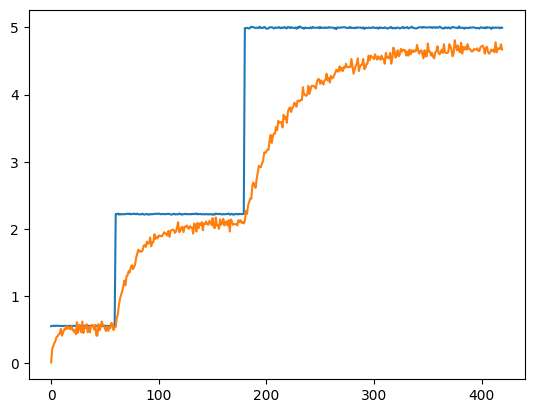

In [110]:
hS = hsim.subs(valors).n()
fhS = sp.lambdify(I,hS)
ID = data['Flow in (ml/s)']
plt.plot(fhS(ID))
plt.plot(data['Level (mm)'] / 10)

In [35]:
# E = S - D
E = hqS - hqD
E

NameError: ignored

### Coeficients de sensitivitat del model

In [19]:
# CX = X / F * sp.diff(F, X)

## Verificació i validació

### Verificació

### Validació

In [20]:
# Dades

In [21]:
# Simulació

In [22]:
# Discrepància
# E = S - D
# E

In [23]:
# Derivades parcials
# mesures = {}
# SX = sp.diff(E, X).subs(valors).subs(mesures).n()

In [24]:
# Incertesa dels paràmetres al quadrat
# up2 = np.sum(np.power([
#     SX * EX,
# ], 2))
# up2

In [25]:
# Incertesa de l'estimació de la discrepància
# uV = np.sqrt(up2)

# Discrepància
# show("E = %0.3f \pm %0.3f" % (E, uV))

In [26]:
# Nivell de confiança per un error del 5% amb nu graus de llibertat
# t = 0.05 / ur
# l, h = stats.t.cdf([-t, t], nu)
# CL = h - l

In [27]:
# Interval de t per un cert nivell de confiança amb nu graus de llibertat
# stats.t.interval(CL, nu) 

## Anàlisi crítica

In [28]:
# Resultat

# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='img_Gutter'></a> https://commons.wikimedia.org/wiki/File:FiberGutter1.jpg
- <a id='img_Segment'></a> https://commons.wikimedia.org/wiki/File:Circularsegment.svg

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg